In [1]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df = pd.read_csv("../Bussiness.csv")

df = df.drop("Unnamed: 0", axis=1)

In [3]:
class EmbeddingNN(nn.Module):
    def __init__(self, num_categories, embedding_dim, num_numeric_features, num_classes):
        super(EmbeddingNN, self).__init__()
        self.embedding = nn.Embedding(num_categories, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim + num_numeric_features, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x_categorical, x_numeric):
        x_cat = self.embedding(x_categorical).view(-1, embedding_dim)
        x = torch.cat([x_cat, x_numeric], dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
X = df.drop("LabelIndex", axis=1).values
y = df["LabelIndex"].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

torch_df = TensorDataset(X_tensor, y_tensor)

In [6]:
model = SimpleNN()
model.train()

k = 5   
kf = StratifiedKFold(n_splits=k)
accuracies = []

for train_idx, test_idx in kf.split(X,y):

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)

  train_loader = DataLoader(torch.utils.data.Subset(torch_df, train_idx), batch_size=64, shuffle=True)
  test_loader = DataLoader(torch.utils.data.Subset(torch_df, test_idx), batch_size=64, shuffle=False)
  
  for epoch in range(10):
    running_loss = 0.0

    for inputs, labels in train_loader:
      
      optimizer.zero_grad()
    
      outputs = model(inputs)
  
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
    
      running_loss += loss.item() * inputs.size(0)
  
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

Epoch 1, Loss: 1.4971
Epoch 2, Loss: 0.8504
Epoch 3, Loss: 0.7442
Epoch 4, Loss: 0.7037
Epoch 5, Loss: 0.6760
Epoch 6, Loss: 0.6553
Epoch 7, Loss: 0.6411
Epoch 8, Loss: 0.6328
Epoch 9, Loss: 0.6234
Epoch 10, Loss: 0.6175
Epoch 1, Loss: 0.6562
Epoch 2, Loss: 0.6438
Epoch 3, Loss: 0.6387
Epoch 4, Loss: 0.6356
Epoch 5, Loss: 0.6321
Epoch 6, Loss: 0.6313
Epoch 7, Loss: 0.6271
Epoch 8, Loss: 0.6273
Epoch 9, Loss: 0.6235
Epoch 10, Loss: 0.6226
Epoch 1, Loss: 0.6113
Epoch 2, Loss: 0.6113
Epoch 3, Loss: 0.6095
Epoch 4, Loss: 0.6068
Epoch 5, Loss: 0.6072
Epoch 6, Loss: 0.6057
Epoch 7, Loss: 0.6034
Epoch 8, Loss: 0.6032
Epoch 9, Loss: 0.6007
Epoch 10, Loss: 0.6022
Epoch 1, Loss: 0.6022
Epoch 2, Loss: 0.5995
Epoch 3, Loss: 0.5985
Epoch 4, Loss: 0.5976
Epoch 5, Loss: 0.5968
Epoch 6, Loss: 0.5957
Epoch 7, Loss: 0.5943
Epoch 8, Loss: 0.5957
Epoch 9, Loss: 0.5946
Epoch 10, Loss: 0.5942
Epoch 1, Loss: 0.6069
Epoch 2, Loss: 0.6060
Epoch 3, Loss: 0.6044
Epoch 4, Loss: 0.6043
Epoch 5, Loss: 0.6023
Epoch 

In [7]:
from sklearn.metrics import classification_report

model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

print("\nClassification Report:")
print(classification_report(all_labels, all_predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11441
           1       0.97      0.21      0.34     11399
           2       0.49      0.02      0.04     11385
           3       1.00      1.00      1.00     11046
           4       0.88      0.86      0.87     11370
           5       0.96      1.00      0.98     11370
           6       0.48      0.91      0.63     11356
           7       0.63      0.86      0.73     11346
           8       0.99      1.00      0.99     11323
           9       0.58      0.29      0.39     11320
          10       0.47      0.54      0.51     11318
          11       0.55      0.99      0.71     11308

    accuracy                           0.72    135982
   macro avg       0.75      0.72      0.68    135982
weighted avg       0.75      0.72      0.68    135982



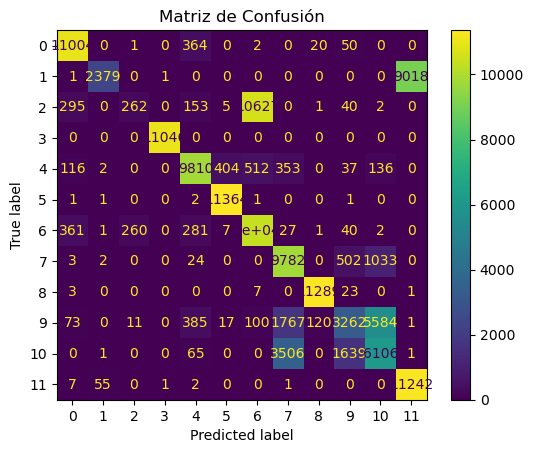

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Matriz de Confusión')
plt.show()
